<a href="https://colab.research.google.com/github/retazo0018/Deep-Learning/blob/master/LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs

#Create Input Data

In [7]:
observations = 1000
xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)
[[ 4.89249744]
 [ 1.88940584]
 [-2.37654107]
 [ 2.69245575]]


# Set Target/Output values

In [8]:
# targets = f(x,z) = 2*x - 3*z + 5 + noise

noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


# View the Data

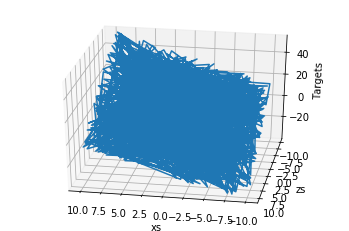

In [9]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

# Initialise the weights and biases

In [10]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range, init_range, size=(1,1))

print(weights,biases)

[[0.09055568]
 [0.02409268]] [[-0.09157786]]


# Set the learning rate

In [0]:
learning_rate = 0.02

# Train the model
* Calculate outputs
* Compare outputs to targets through the loss
* Print the loss
* Adjust weights and biases
* Repeat the above steps until loss is minimized

In [13]:
for i in range(100):
  outputs = np.dot(inputs,weights)+biases
  deltas = outputs-targets

  loss = np.sum(deltas ** 2) / 2 / observations
  # division by a constant does not change the logic of the loss, as it is still lower for higher accuracy

  print(loss)

  deltas_scaled = deltas/observations
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  # 2*1   = 2*1                              2*1000    1000*1

  biases = biases - learning_rate * np.sum(deltas_scaled)

207.24448384386224
41.850855008001744
16.61547734353663
12.422494386972234
11.405897152260149
10.882033279480957
10.446928670014167
10.03924803648867
9.649207313154191
9.274800394072985
8.915212809751214
8.569829703274348
8.238085706673033
7.919441572648703
7.613379918969776
7.319403879601638
7.0370362214703945
6.7658185581979575
6.505310604235326
6.255089459856335
6.014748924597261
5.783898837838917
5.562164445432353
5.349185791335603
5.144617133273337
4.94812638147064
4.759394559549819
4.578115286715036
4.403994280384193
4.236748878460623
4.076107580469097
3.9218096068112387
3.7736044754247984
3.631251595159658
3.494519875210342
3.363187349971122
3.2370408187046014
3.115875499438951
2.999494696531815
2.8877094813613495
2.7803383856259223
2.6772071067546914
2.578148224950746
2.4830009314075325
2.391610767257327
2.303829372827984
2.2195142468009017
2.1385285148792623
2.0607407075909587
1.9860245468655453
1.9142587410387377
1.8453267879516544
1.7791167858251968
1.7155212516025211
1.6544

#Print weights and biases and see if we have worked correctly

In [14]:
print(weights, biases)

[[ 2.00837336]
 [-2.99087952]] [[4.3367931]]


# Plot last outputs vs targets
* Since they are the last ones at the end of training, they represent the final model accuracy.
* The closer the plot is to 45 degree line, closer the target and output values are.

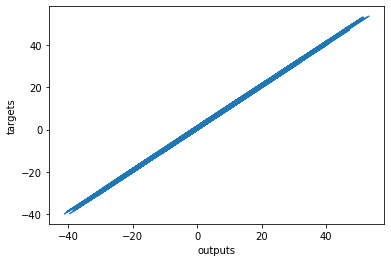

In [15]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()